# Fourier Transformation

https://krischer.github.io/seismo_live_build/html/Signal%20Processing/fourier_transform_wrapper.html

## Introduction


### ist auch ein model fitting
### youtube videos gibts ne menge, z.b. ...

klaus hinzen - slow fft 

In this notebook we will learn how to apply the 1D Fourier Transformation (FT). The Fourier Transformation is often used to do the transformation from the time (or spatial) domain to the frequency domain (and backwards). The goal of the FT is to investigate its frequency content.


This process is done in the easiest way by the fourier series  (FS, [Wiki](https://en.wikipedia.org/wiki/Fourier_series) or [simpleWiki](https://simple.wikipedia.org/wiki/Fourier_transform)). Hereby, (multiple) sinus and cosine with different frequencies are sumed trying to recreate the original signals. For the FT this sum replaced by the integral. In orther words, the FT is used to find the base functions (sin/cos)/frequencies of the signal. The frequencies and its amplitude are combined to create the fourier amplitude spectrum.

In computational science the FS/FT is realized by the discrete fourier transform (DFT), often used in combination with the fast fourier transform (FFT) algorithm.


In depth explanation, e.g. [here](https://www.thefouriertransform.com/)

Possible applications are:
- frequency content of data
- light split into its color-content
- mineralogy - spectroscopy
- ...

Is used/needed for the following lectures:
- Digital Seismology
- almost everywhere



## Table of Contents
- [Fast Fourier Transform](#Fast_Fourier_Transform)
- [Testing Different Frequencies](#Testing_Different_Frequencies)
- [Multiple Frequencies](#Multiple_Frequencies)
- [Specials](#Specials)
- [Summary](#Summary)




# What about phase spectrum?????

evtl pencil plot nehmen
evtl weniger dicht zeitsample nehmen

<a id='Fast_Fourier_Transform'></a> 
# Fast Fourier Transform

In [2]:
import numpy as num
import scipy as sp
import matplotlib.pyplot as plt

First we create some synthetic time signal. For that we need to define its sampling frequency (df), meaning how many data points we want to have within one second, its inverse is the sampling intveral (dt), meaning how long is the time between two samples, and the length of our time trace.

For the beginning we chose as function a sinus with a frequency of fr1 = 1 Hz, meaning every second the sinus repeats itself.

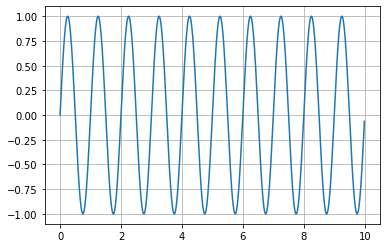

In [3]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df
#print(x)

fr1 = 1 # frequency of signal  [Hz], inverse of periode
ydata = num.sin(2 * num.pi * fr1 * x)
plt.figure()
plt.plot(x, ydata)
plt.grid()
plt.show()

The FT produces a amplitude spectrum and the phase spectrum. In most of the cases the phase information is not relevant, as in general, its interpretation is hard. Therefore, it is often neglected (not shown). When someone mentions fourier spectrum usually they refer to the amplitude spectrum. 

Next, we apply the FT in Numpy. We can use either the ['fft'](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) (full spectra, with imaginary values) or  ['rfft'](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html) (real values only). For most cases the rfft is sufficient as this is part of the spectrum that we can easily interprete. This produces the amplitudes, the absolute value is rarely of interest, usually it the amplitudes are interprete in relation to the rest of the signal. Besides that, we are also interested in the correct information about the frequencies. Therefore, we can either calculate the frequencies manually by taking the sampling frequency and the signal length into account or giving this information to a helper function of numpy rfftfreq. It returns the correct frequencies to our previously gathered amplitudes.



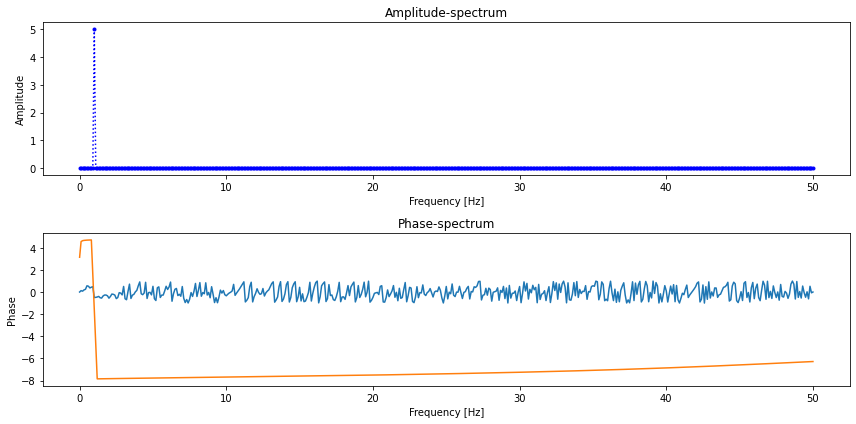

In [4]:
# Apply the ft - fft stands for fast-fourier-transform
ft = num.fft.rfft(ydata)

# To get the amplitude spectrum, only the real values are of interest - absolute
amps = abs(ft) * dt
phase =  num.angle(ft)  / num.pi

# Creating the corresponding frequencies
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(12, 6))
ax = plt.subplot(2, 1, 1)
ax.plot(freqs, amps, 'b.:')
#ax.semilogx(freqs, amps, 'b.:')
#ax.loglog(freqs, amps, 'b.:')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.set_title('Amplitude-spectrum')

ax = plt.subplot(2, 1, 2)
ax.plot(freqs, phase)
ax.phase_spectrum(ydata, Fs=1/dt)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Phase')
ax.set_title('Phase-spectrum')
plt.tight_layout()
plt.show()

There is also the inverse-transformation: from frequency domain to the time domain, e.g. [irfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft.html#numpy.fft.irfft).

<a id='Testing_Different_Frequencies'></a> 
# Testing Different frequencies
### Tasks:
- Play with the frequency of the sinus and the see the changes in the spectrum.

Take into account that the valid frequencies depend on your data:

- The highest possible frequency that can be displayed depends on the sampling rate. Here the [Nyquist(-Shannon)-Theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem) plays an important role. In short: frequencies higher than half of your sampling rate cannot be displayed correctly. That is why your x-axis in the example only shows maximum 50 Hz (df/2). Thus, the higher our sampling rate the higher the frequencies we can investigate.
-- Try frequencies: e.g. 40 and 60 Hz

- The lowest possible frequency depends on the length of your data.
-- Try frequencies: lower than 0.1 Hz

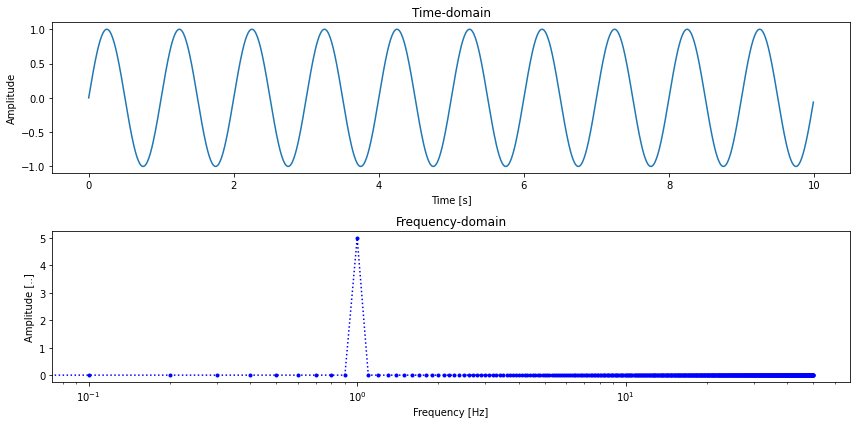

In [5]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df
#print(x)

fr1 = 1 # frequency of signal  [Hz]
ydata = num.sin(2 * num.pi * fr1 * x) # + num.random.normal(0, 0.1, len(x))

# Get amplitudes and frequencies
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(12, 6))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps, 'b.:'s)
ax.semilogx(freqs, amps, 'b.:')
#ax.loglog(freqs, amps, 'b.:')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
ax.set_title('Frequency-domain')
plt.tight_layout()
plt.show()

<a id='Multiple_Frequencies'></a> 
# Multiple Frequencies
The investigated what the Fourier Transformation is capable of we add multiple frequencies. The signal (usually) cannot be distuiged by us directly, in terms of frequency content.

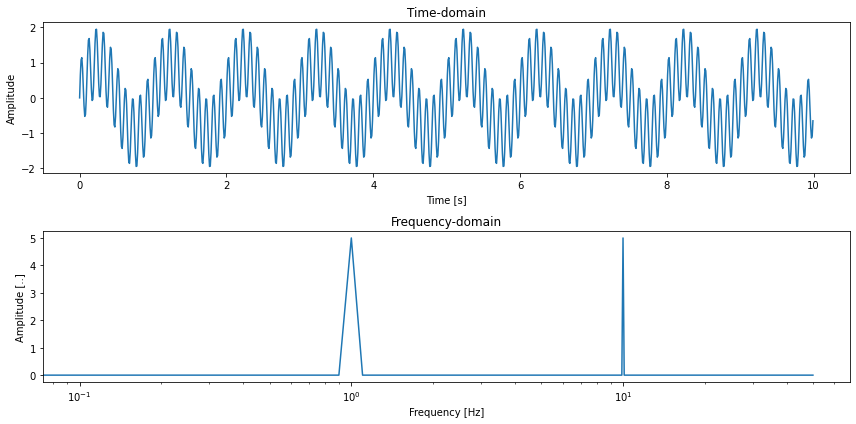

In [16]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

fr1 = 1.
fr2 = 10.
ydata = num.sin(2 * num.pi * fr1 * x) 
ydata += num.sin(2 * num.pi * fr2 * x)

# Get amplitudes and frequencies
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(12, 6))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
ax.set_title('Frequency-domain')
plt.tight_layout()
plt.show()

### Tasks
- change the sinus and cosine
- add noise to the data

The amplitude spectrum of the FT does not distinguish between cosine and sinus, as it only evaluates the frequency content of a signal, independent of its origin. Meaning two different wavesforms can produce the same amplitude spectrum. As the FFT and its inverse are "unqie and reversable" functions, the differences between sinus and cosine are therefore only present in the phase spectra.

<a id='Specials'></a> 
# Specials
In the following some special case are shown to demonstrate what the FT is capable of.

E.g. 
- a peak in time corresponds to a horizontal line in frequency (all frequencies)
- a lot of frequencies

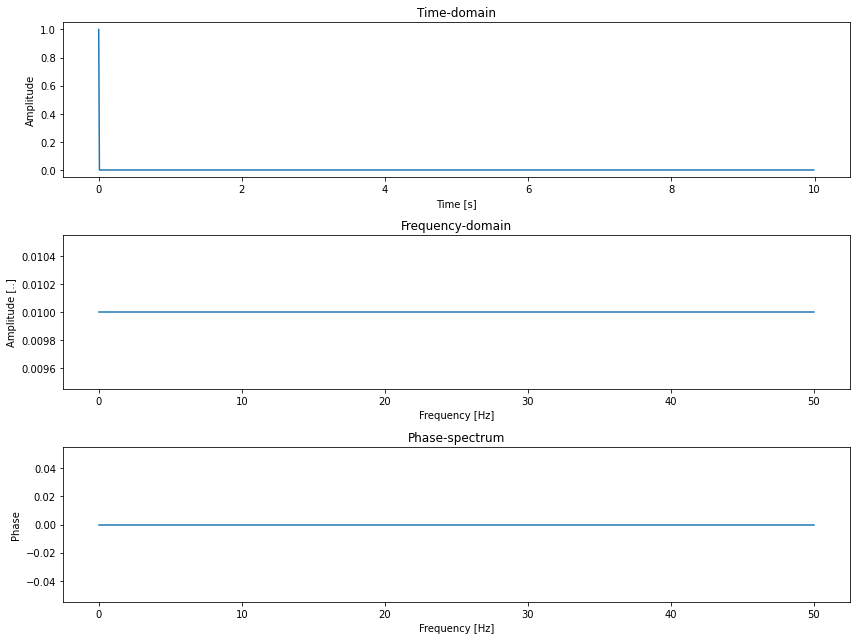

In [6]:
df = 100 # Sampling frequency [Hz]
timelen = 10 # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

# Creating a array full of zeros
ydata = num.zeros(numsamples)

## single peak
# ydata[498] = 0.25
# ydata[499] = 0.5
ydata[0] = 1
# ydata[501] = 0.5
# ydata[502] = 0.25

## box
# ydata[450:550] = 1

ft = num.fft.rfft(ydata)

amps = abs(ft) * dt
phase =  num.angle(ft) / num.pi
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(12, 9))
ax = plt.subplot(3, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')

ax = plt.subplot(3, 1, 2)
ax.plot(freqs, amps)
#ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
ax.set_title('Frequency-domain')
plt.tight_layout()


ax = plt.subplot(3, 1, 3)
ax.plot(freqs, phase)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Phase')
ax.set_title('Phase-spectrum')
plt.tight_layout()

plt.show()

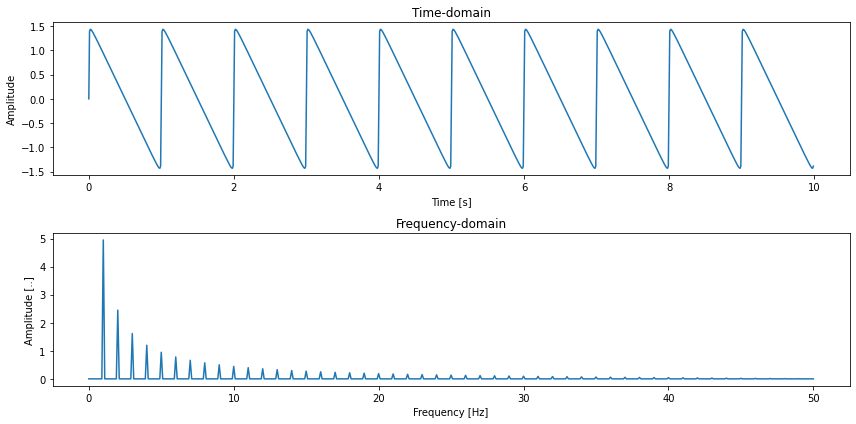

In [39]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

frequencies = num.linspace(1, 100, 100)
# print(frequencies)

ydata = num.zeros(numsamples)
for ff in frequencies:
    ydata += (1/ff) * num.sin(2 * num.pi * ff * x)
#     ydata += ff * num.sin(2 * num.pi * ff * x)

ft = num.fft.rfft(ydata)
amps = abs(ft) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(12, 6))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')
plt.tight_layout()

ax = plt.subplot(2, 1, 2)
ax.plot(freqs, amps)
#ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
ax.set_title('Frequency-domain')
plt.tight_layout()
plt.show()

# ft is complex signal, example mit full fft, muss nicht immer symmetrisch sein ...

<a id='Summary'></a> 
# Summary

We have learned 
- the basic behaviour of the fourier transformation
- that it analyzes the frequency content of a signal
- different signals and their corresponding spectrum